Problem statement:  
Given is the hourly rental data of Bird-Electric Scooter Rental Company. The goal is to explore the 
various correlations between Casual, Register, Count with other variables in the dataset. 
We recommend using Python for this assignment and are free to use any packages and 
IDE.  Submissions are evaluated based on how the candidate is able to explore the data 
using charts, correlation matrix, etc. And provide relevant recommendations and 
conclusions for the business. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('training_data 1.csv')

In [3]:
data

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,7231,2012-04-19 16:00:00,2,0,1,1,25.42,31.060,41,7.0015,63,324,387
1,9097,2012-09-02 10:00:00,3,0,0,2,29.52,34.850,79,0.0000,158,230,388
2,5379,2011-12-18 05:00:00,4,0,0,1,8.20,11.365,59,7.0015,1,4,5
3,4201,2011-10-07 02:00:00,4,0,1,1,17.22,21.210,88,0.0000,0,5,5
4,774,2011-02-15 16:00:00,1,0,1,1,13.94,15.910,19,16.9979,21,77,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,10394,2012-11-18 12:00:00,4,0,0,1,16.40,20.455,62,19.0012,101,341,442
8704,1209,2011-03-15 04:00:00,1,0,1,1,9.84,12.880,75,6.0032,1,1,2
8705,2675,2011-06-19 09:00:00,2,0,0,2,27.88,31.820,74,7.0015,58,111,169
8706,4671,2011-11-07 17:00:00,4,0,1,1,20.50,24.240,45,11.0014,39,489,528


In [4]:
data.head(10)

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,7231,2012-04-19 16:00:00,2,0,1,1,25.42,31.060,41,7.0015,63,324,387
1,9097,2012-09-02 10:00:00,3,0,0,2,29.52,34.850,79,0.0000,158,230,388
2,5379,2011-12-18 05:00:00,4,0,0,1,8.20,11.365,59,7.0015,1,4,5
3,4201,2011-10-07 02:00:00,4,0,1,1,17.22,21.210,88,0.0000,0,5,5
4,774,2011-02-15 16:00:00,1,0,1,1,13.94,15.910,19,16.9979,21,77,98
5,1540,2011-04-10 01:00:00,2,0,0,2,15.58,19.695,87,8.9981,6,31,37
6,10538,2012-12-05 12:00:00,4,0,1,1,18.04,21.970,41,19.0012,24,208,232
7,8328,2012-07-08 09:00:00,3,0,0,1,35.26,40.910,50,7.0015,70,172,242
8,612,2011-02-08 16:00:00,1,0,1,1,9.02,9.090,35,35.0008,4,79,83
9,3040,2011-07-15 14:00:00,3,0,1,1,28.70,32.575,51,12.9980,105,160,265


In [5]:
# summary statistics
data.describe()

,Unnamed: 0,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,5467.935691,2.514929,0.029054,0.684543,1.419040,20.232568,23.651105,61.781350,12.848379,35.962563,155.166973,191.129536
std,3135.001671,1.117485,0.167967,0.464724,0.635637,7.768970,8.458119,19.313038,8.157084,50.103873,150.397856,180.674085
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2755.750000,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,36.000000,42.000000
50%,5476.000000,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,16.000000,118.000000,145.000000
75%,8198.250000,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,17.498725,49.000000,222.000000,283.000000
max,10884.000000,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
data.isnull().sum()

Unnamed: 0    0
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [9]:
data['hour'] = data['datetime'].dt.hour

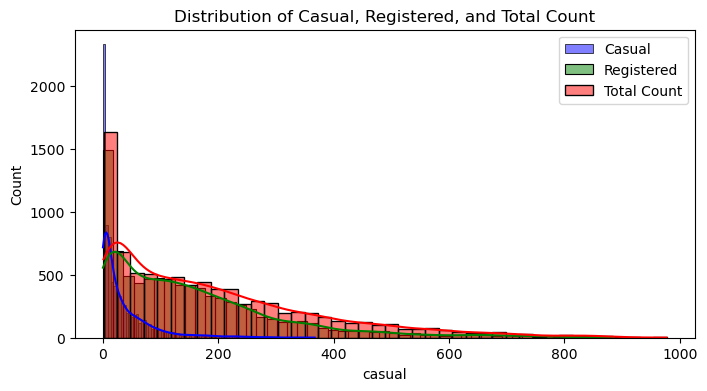

In [17]:
# Plot distributions of Casual, Registered, and Count
plt.figure(figsize=(8, 4))
sns.histplot(data['casual'], kde=True, color='blue', label='Casual')
sns.histplot(data['registered'], kde=True, color='green', label='Registered')
sns.histplot(data['count'], kde=True, color='red', label='Total Count')
plt.legend()
plt.title('Distribution of Casual, Registered, and Total Count')
plt.show()

<Axes: xlabel='casual', ylabel='registered'>

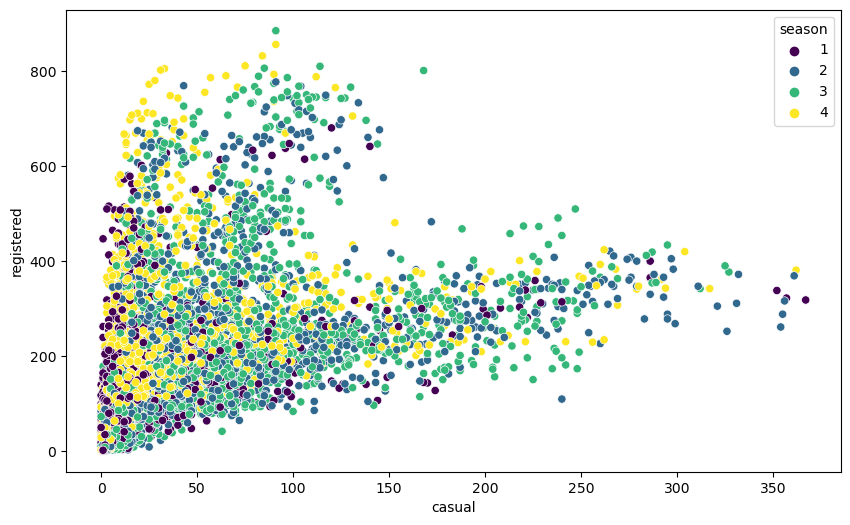

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='casual', y='registered', hue='season', palette='viridis')

NameError: name 'season' is not defined

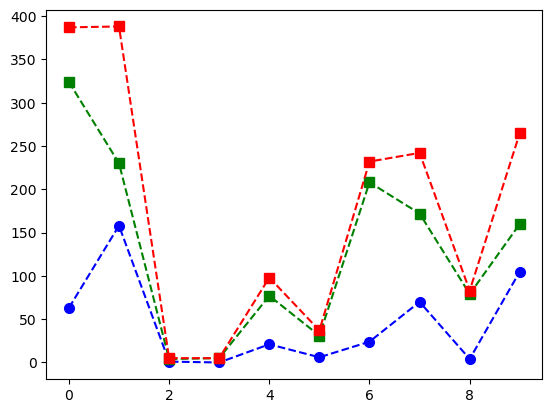

In [30]:
plt.plot(data['casual'].head(10), c='blue', ls='--', marker='o', ms=7, label='casual')
plt.plot(data['registered'].head(10), c='green', ls='--', marker='s', ms=7, label='registered')
plt.plot(data['count'].head(10), c='red', ls='--', marker='s', ms=7, label='Total Count')
plt.xticks(list(range (0,10)),season, rotation = 'vertical')
plt.legend()
plt.title('Distribution of Casual, Registered, and Total Count')
plt.show()